In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.VincentTargets import TwoModes
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
from FittedModels.utils.plotting_utils import plot_distributions

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

In [4]:
target = TwoModes(2.0, 0.1)

# Same settings as Vincen'ts model

In [5]:
torch.manual_seed(1)
torch.set_default_dtype(torch.float64)
# ******************* Parameters *******************
# using the same as Vincent's code so we have a fair comparison
dim = 2
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = 20
lr = 1e-4
train_prior = False
weight_decay = 1e-6
optimizer = "Adam"
flow_type = "RealNVP"  
loss_type = "kl"
initial_flow_scaling = 1.0
n_flow_steps = 64
annealing = True
clip_grad_norm = False
n_plots = 20

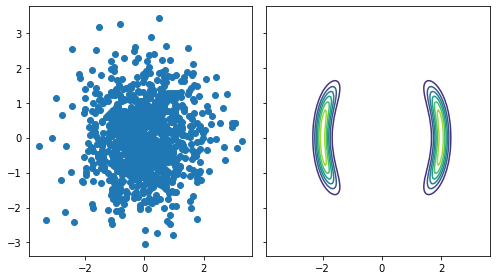

loss: -2.9408377528852183, mean log p_x -23.11012257631321:   0%|          | 0/20000 [00:00<?, ?it/s]

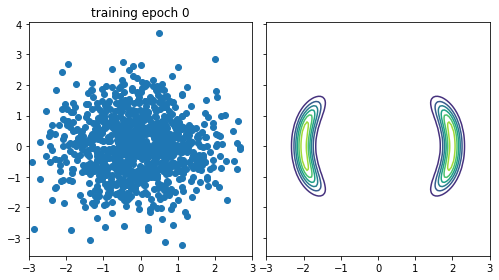

loss: -1.4758736719716579, mean log p_x -20.290662322954905:   5%|▌         | 1000/20000 [03:15<1:15:34,  4.19it/s]

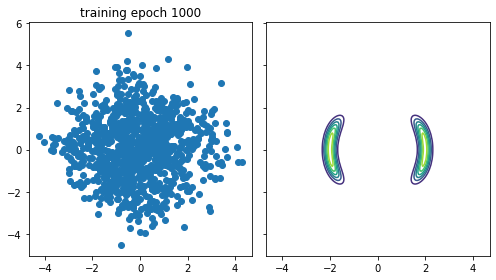

loss: -0.2903175779020782, mean log p_x -16.535185760290876:  10%|█         | 2000/20000 [07:42<1:24:02,  3.57it/s] 

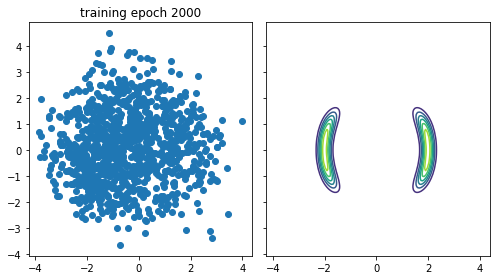

loss: -1.4463863280968141, mean log p_x -3.1635683856344716:  15%|█▌        | 3000/20000 [12:04<1:18:59,  3.59it/s]

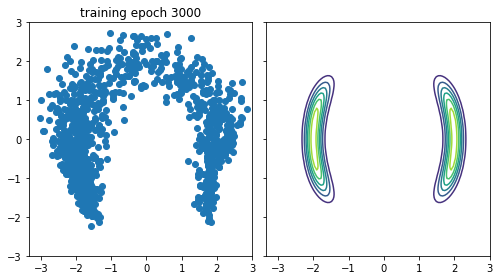

loss: -1.4579283952389903, mean log p_x -1.9272086942084863:  20%|██        | 4000/20000 [16:25<1:06:13,  4.03it/s]

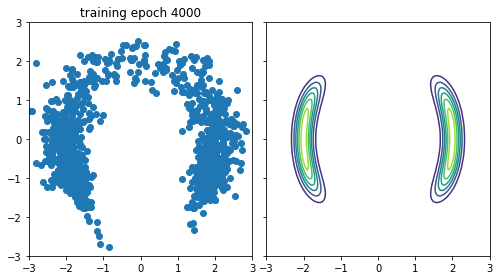

loss: -1.186624118670091, mean log p_x -1.7389658081618569:  25%|██▌       | 5000/20000 [20:41<1:07:32,  3.70it/s] 

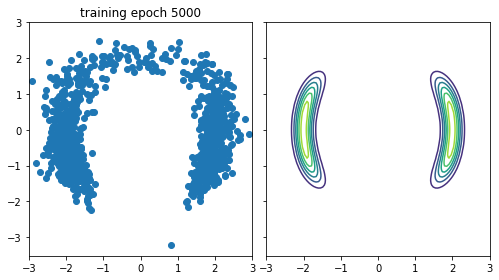

loss: -1.1417698662701932, mean log p_x -1.4699608478712585:  30%|███       | 6000/20000 [24:58<1:01:35,  3.79it/s] 

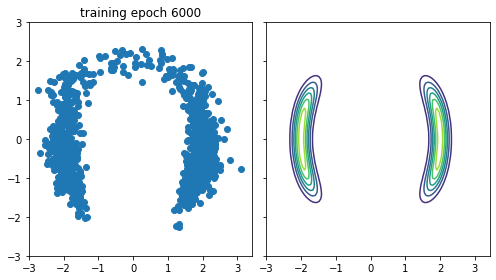

loss: -0.8684926607066527, mean log p_x -0.9178156264593688:  35%|███▌      | 7000/20000 [29:14<1:00:04,  3.61it/s] 

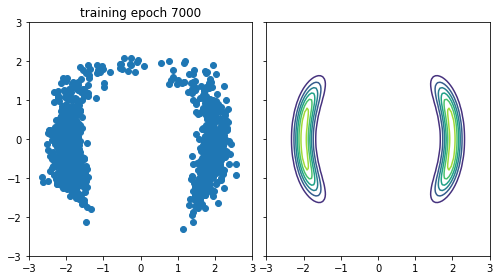

loss: -0.960535332813722, mean log p_x -0.6635184057654526:  40%|████      | 8000/20000 [33:33<48:58,  4.08it/s]    

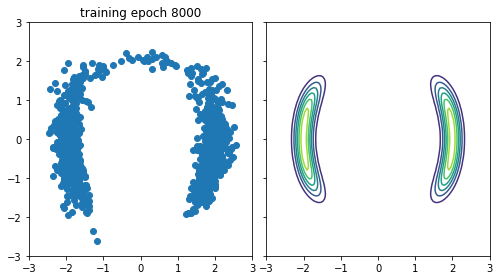

loss: -0.7072496818771142, mean log p_x -0.7299854600472038:  45%|████▌     | 9000/20000 [37:53<45:13,  4.05it/s]   

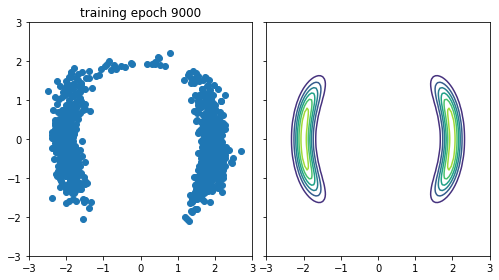

loss: 0.06318910767761898, mean log p_x -1.7050720759943059:  50%|█████     | 10000/20000 [41:59<34:31,  4.83it/s] 

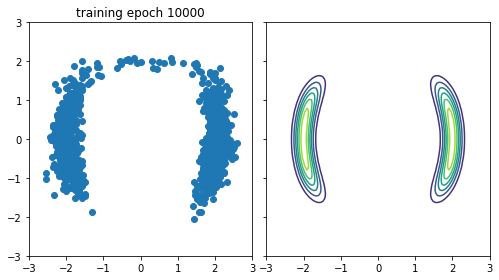

loss: -0.8831323051879778, mean log p_x -0.7950206025539371:  55%|█████▌    | 11000/20000 [45:26<31:28,  4.76it/s]  

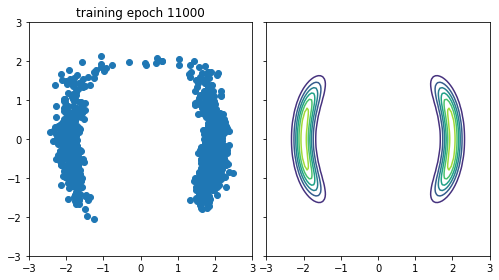

loss: -0.5723673537757155, mean log p_x -0.8158484044776227:  60%|██████    | 12000/20000 [48:15<20:43,  6.44it/s]

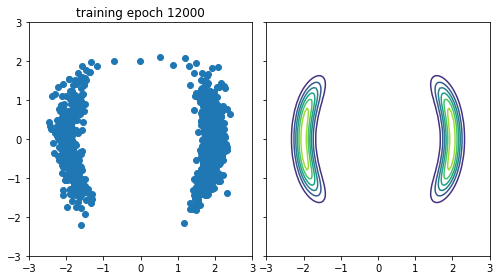

loss: -0.6831274097721952, mean log p_x -0.5420086169673234:  65%|██████▌   | 13000/20000 [50:59<18:55,  6.16it/s] 

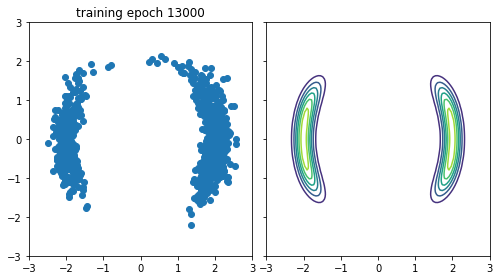

loss: -0.606696610626456, mean log p_x -0.9791958150958712:  70%|███████   | 14000/20000 [53:45<17:19,  5.77it/s] 

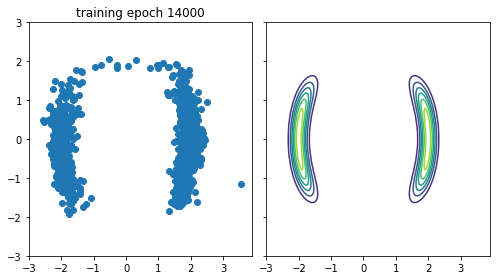

loss: -0.9200267550201042, mean log p_x -0.5644086939701536:  75%|███████▌  | 15000/20000 [56:30<13:15,  6.28it/s] 

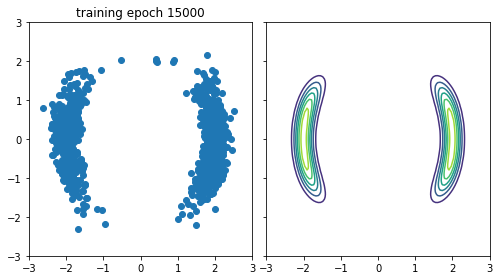

loss: -0.7489556805411669, mean log p_x -0.46462642658262:  80%|████████  | 16000/20000 [59:15<10:40,  6.25it/s]   

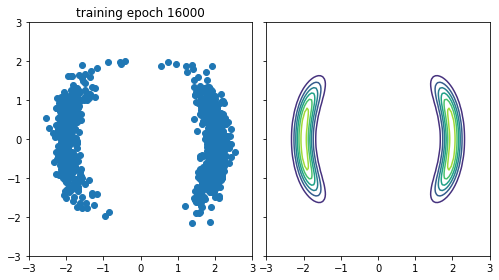

loss: -0.8204781556025648, mean log p_x -0.8555488010263105:  85%|████████▌ | 17000/20000 [1:01:59<08:38,  5.79it/s]

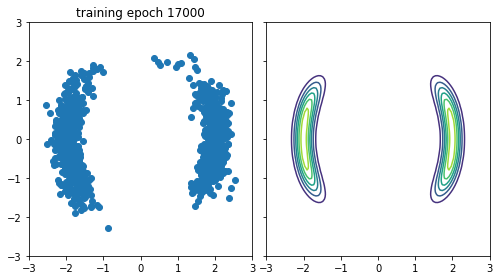

loss: -0.6230554084688278, mean log p_x -0.7751731707927221:  90%|█████████ | 18000/20000 [1:04:41<05:15,  6.35it/s]

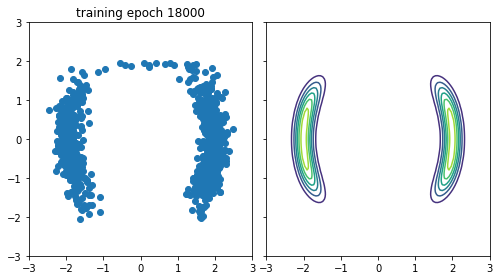

loss: -0.6375347569577712, mean log p_x -0.8439650590089128:  95%|█████████▌| 19000/20000 [1:07:24<02:52,  5.80it/s]

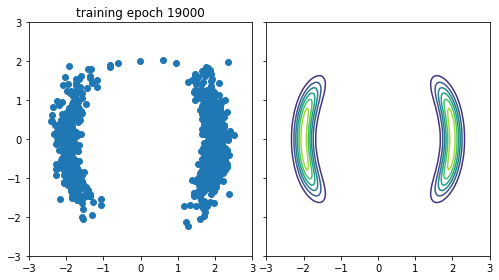

loss: -0.7361832271092398, mean log p_x -0.6235722400943946: 100%|██████████| 20000/20000 [1:10:07<00:00,  4.75it/s] 


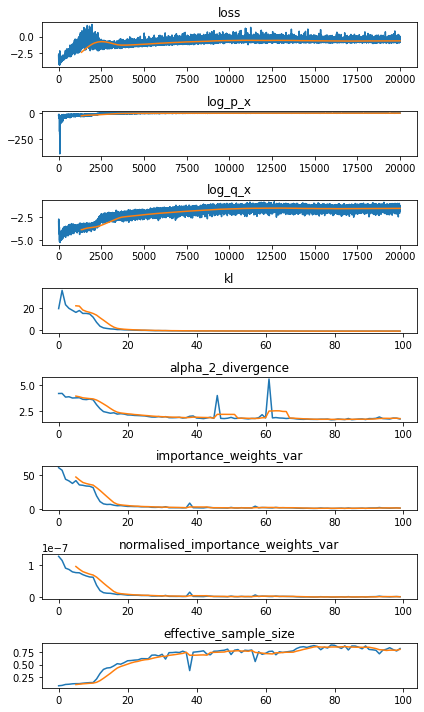

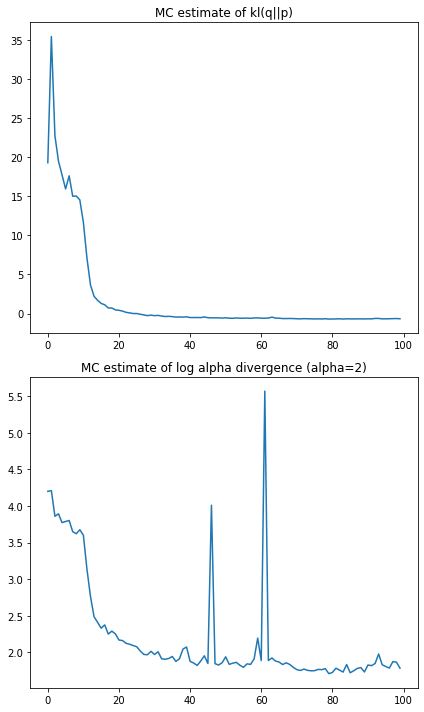

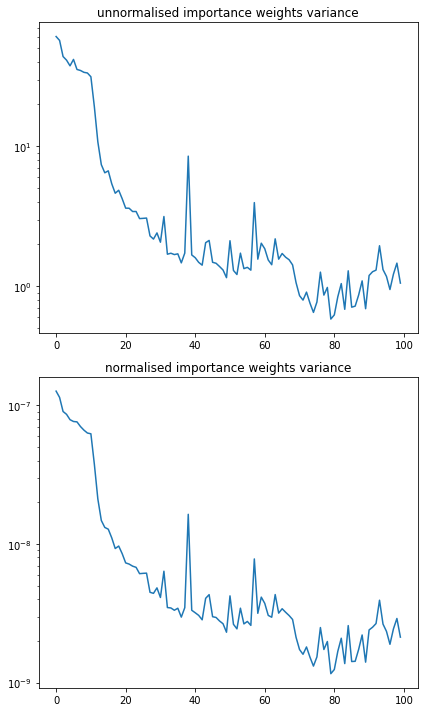

estimate before training is 8.346054342030316 
estimate after training is 8.340936041052213 
effective sample size before is 0.0713351318043863
effective sample size after train is 0.7517128450704191
variance in weights is 3.3029851685280395e-11


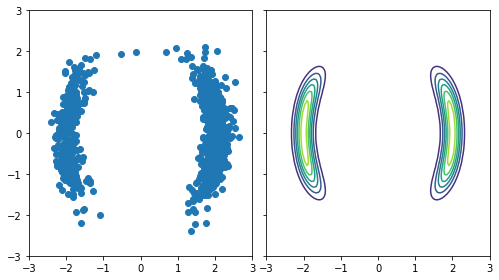

In [6]:
torch.manual_seed(1)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)


if train_prior:
    history_prior = tester.train_prior(epochs=200, batch_size=batch_size, lr=0.01)
    plot_history(history_prior)
    plt.show()
    plot_samples_vs_contours(tester)
    plt.show()
    expectation_prior_trained, info_prior = tester.estimate_expectation(n_samples_estimation, expectation_function)


history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

if train_prior:
    print(f"estimate after prior training is {expectation_prior_trained} \n"
        f"effective sample size trained prior is {info_prior['effective_sample_size'] / n_samples_estimation}\n")

plot_samples_vs_contours(tester, n_samples=1000)
plt.show()

In [11]:
n_samples_estimation = int(1e6)

In [12]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 8.346054342030316 
estimate after training is 8.354095348703508 
effective sample size before is 0.007133513180438631
effective sample size after train is 0.7317171575429054
variance in weights is 3.6664865375180327e-13
